# Evaluation Notebook for Experiment 1: 
## Supervised Visual Odometry using Monocular Images

Images were stacked along their colour channels to form a 6-channel pose pair of images

In [1]:
from configuration import get_config
from evaluation import get_predicted_trajectory, get_actual_trajectory
from evaluation import get_predicted_poses, get_actual_poses

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from math import sqrt
%matplotlib inline 

## Qualitative Trajectory Evaluation

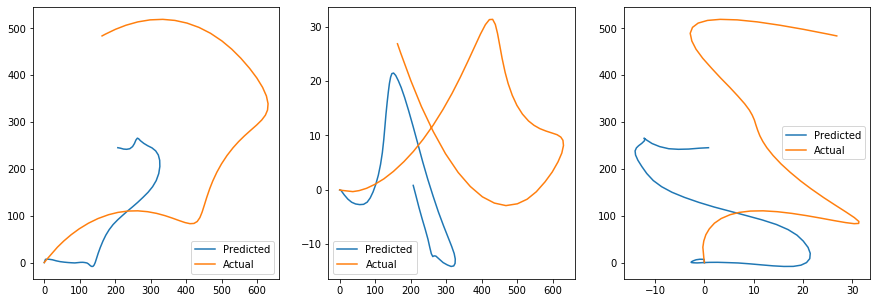

In [2]:
cfg = get_config()

# Get predicted and actual trajectories
predicted = get_predicted_trajectory(force_recalculate=False)
actual = get_actual_trajectory()

predicted_xs, predicted_ys, predicted_zs = predicted[:, 0], predicted[:, 1], predicted[:, 2]
actual_xs, actual_ys, actual_zs = actual[:, 0], actual[:, 1], actual[:, 2]

# Plot some trajectories
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(131)
ax.plot(predicted_xs, predicted_zs, label="Predicted")
ax.plot(actual_xs, actual_zs, label="Actual")
ax.legend()

ax = fig.add_subplot(132)
ax.plot(predicted_xs, predicted_ys, label="Predicted")
ax.plot(actual_xs, actual_ys, label="Actual")
ax.legend()

ax = fig.add_subplot(133)
ax.plot(predicted_ys, predicted_zs, label="Predicted")
ax.plot(actual_ys, actual_zs, label="Actual")
ax.legend()

plt.show()

## Absolute Position Error (Cumulative)


Average Cumulative Position Error (mm)
╒════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ -      │ X                   │ Y                   │ Z                   │
├────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Mean   │ -194.70265072809886 │ -10.91493971707426  │ -142.01176618229428 │
├────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ RMS    │ 227.9407426039792   │ 12.845325071810677  │ 157.60545806328193  │
├────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Median │ -236.9134254472412  │ -11.653916709229144 │ -129.3837839400675  │
╘════════╧═════════════════════╧═════════════════════╧═════════════════════╛


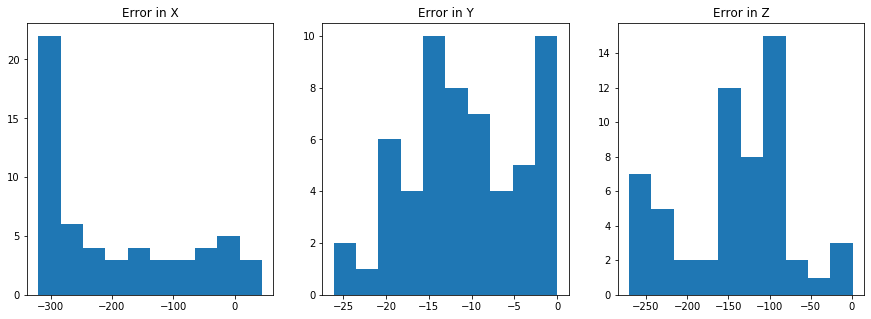

In [3]:
# Evaluate absolute position error

error_x = predicted_xs - actual_xs
error_y = predicted_ys - actual_ys
error_z = predicted_zs - actual_zs

table = [
    ["-", "X", "Y", "Z"],
    ["Mean", np.mean(error_x), np.mean(error_y), np.mean(error_z)],
    ["RMS", sqrt(np.mean(error_x**2)), sqrt(np.mean(error_y**2)), sqrt(np.mean(error_z**2))],
    ["Median", np.median(error_x), np.median(error_y), np.median(error_z)],
]
print("")
print("Average Cumulative Position Error (mm)")
print(tabulate(table, tablefmt="fancy_grid"))

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)
ax.set_title("Error in X")
_ = ax.hist(error_x)

ax = fig.add_subplot(132)
ax.set_title("Error in Y")
_ = ax.hist(error_y)

ax = fig.add_subplot(133)
ax.set_title("Error in Z")
_ = ax.hist(error_z)

## Relative Translational Error (Instantaneous Pose Estimates)

In [4]:
predicted = get_predicted_poses(force_recalculate=False)
actual = get_actual_poses()

px, py, pz = predicted[:, 0], predicted[:, 1], predicted[:, 2]
pRx, pRy, pRz = predicted[:, 3], predicted[:, 4], predicted[:, 5]
x, y, z = actual[:, 0], actual[:, 1], actual[:, 2]
Rx, Ry, Rz = actual[:, 3], actual[:, 4], actual[:, 5]


Relative Translational Error (mm)
╒════════╤═════════════════════╤═════════════════════╤══════════════════════╕
│ -      │ X                   │ Y                   │ Z                    │
├────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ Mean   │ 0.07307805821844345 │ -1.8920772199597948 │ 1.4051108090851987   │
├────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ RMS    │ 2.503922593985662   │ 3.126296223516694   │ 4.976588191622887    │
├────────┼─────────────────────┼─────────────────────┼──────────────────────┤
│ Median │ 0.9325693682018137  │ -2.275761796280977  │ -0.07842636408549519 │
╘════════╧═════════════════════╧═════════════════════╧══════════════════════╛


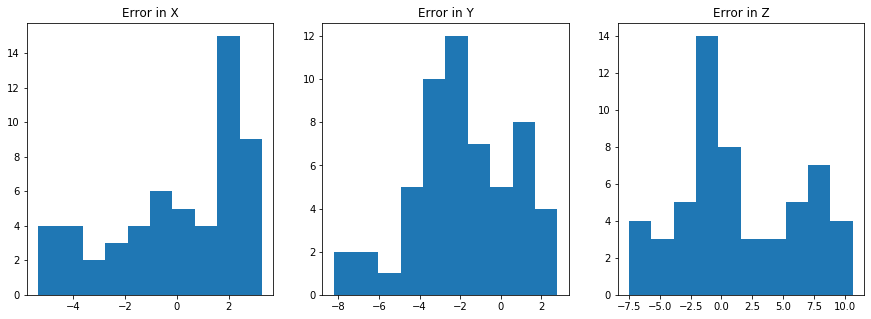

In [5]:
error_x = px - x
error_y = py - y
error_z = pz - z

table = [
    ["-", "X", "Y", "Z"],
    ["Mean", np.mean(error_x), np.mean(error_y), np.mean(error_z)],
    ["RMS", sqrt(np.mean(error_x**2)), sqrt(np.mean(error_y**2)), sqrt(np.mean(error_z**2))],
    ["Median", np.median(error_x), np.median(error_y), np.median(error_z)],
]

print("")
print("Relative Translational Error (mm)")
print(tabulate(table, tablefmt="fancy_grid"))

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)
ax.set_title("Error in X")
_ = ax.hist(error_x)

ax = fig.add_subplot(132)
ax.set_title("Error in Y")
_ = ax.hist(error_y)

ax = fig.add_subplot(133)
ax.set_title("Error in Z")
_ = ax.hist(error_z)

## Relative Rotational Error (Instantaneous)


Average Relative Rotational Error (1/1000th Radian)
╒════════╤════════════════════╤═════════════════════╤════════════════════╕
│ -      │ Rx                 │ Ry                  │ Rz                 │
├────────┼────────────────────┼─────────────────────┼────────────────────┤
│ Mean   │ 0.7930814042283705 │ -0.4648760302437025 │ -4.261465534900879 │
├────────┼────────────────────┼─────────────────────┼────────────────────┤
│ RMS    │ 15.327199862490104 │ 1.5565004575873405  │ 8.208172361490785  │
├────────┼────────────────────┼─────────────────────┼────────────────────┤
│ Median │ -1.977266541882396 │ -0.8711460944896616 │ -3.519714240492794 │
╘════════╧════════════════════╧═════════════════════╧════════════════════╛


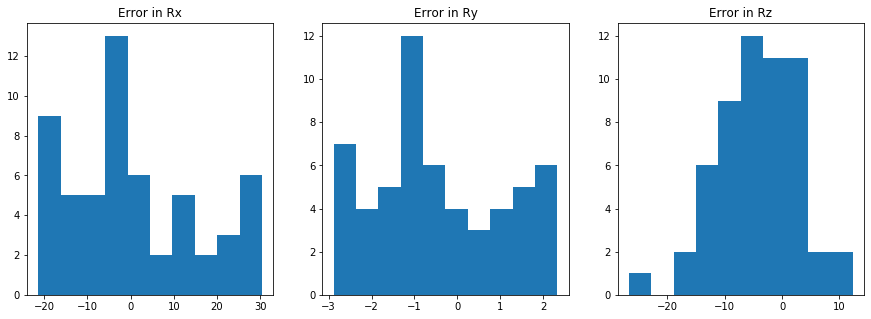

In [6]:
error_x = pRx - Rx
error_y = pRy - Ry
error_z = pRz - Rz

table = [
    ["-", "Rx", "Ry", "Rz"],
    ["Mean", np.mean(error_x), np.mean(error_y), np.mean(error_z)],
    ["RMS", sqrt(np.mean(error_x**2)), sqrt(np.mean(error_y**2)), sqrt(np.mean(error_z**2))],
    ["Median", np.median(error_x), np.median(error_y), np.median(error_z)],
]


print("")
print("Average Relative Rotational Error (1/1000th Radian)")
print(tabulate(table, tablefmt="fancy_grid"))

fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(131)
ax.set_title("Error in Rx")
_ = ax.hist(error_x)

ax = fig.add_subplot(132)
ax.set_title("Error in Ry")
_ = ax.hist(error_y)

ax = fig.add_subplot(133)
ax.set_title("Error in Rz")
_ = ax.hist(error_z)